# Experiment parameters

* Datasets
    * mediamill
    * delicious
* Metrics 
    * Hamming loss
    * F-micro
* Classifier chosen is BR of Naive Bayes. (GaussianNB for mediamill, BernoulliNB for delicious?)
* Partitions : BKM, KM & Random
* k=2,3,4...8 way partitions are chosen.
* Homer (by design?) considers leaf size=1.

**Additional notes**

* The folds used in the original paper are not the same as those in XML repositiory. The original datasets probably had only one fold.
* For now, we will average results over all folds.
* If there is too much variation, have to look at loading the original Tsoumakas datasets.

### Imports

In [1]:
## Imports
import sys
sys.path.append("..")
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [27]:
def average_results(results):
    mean_results=results.groupby(["partitioner","split","k"]).mean()
    mean_results=mean_results.drop(columns=["r"])
    mean_results.reset_index(inplace=True)
    return results


def plot_graphs(results):
    metric_names=["f1_micro","hamming"]#,"train_time","test_time"]
    fig,axes=plt.subplots(len(metric_names),1,squeeze=False,figsize=(8,8*len(metric_names)))
    for i,mname in enumerate(metric_names):
        ax=axes[i][0]
        ax.set_title(mname+" vs k",size="18")
        sb.lineplot(x="k",y=mname,hue="partitioner",data=results,marker="s",ax=ax)
        plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
        plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
        for line in ax.get_legend().get_lines():
            line.set_linewidth(4.0)

# Mediamill

,prec_micro,prec_macro,rec_micro,rec_macro,f1_micro,f1_macro,hamming,p@1,p@3,p@5,...,dcg@3,dcg@5,partition_time,train_time,test_time,row_name,partitioner,split,k,r
0,0.391280,0.067406,0.354183,0.062180,0.371808,0.046971,0.051566,0.319266,0.294771,0.279046,...,0.706844,0.913409,0.677633,2.598523,0.796939,RandomPartitioner_s=0_k=2/r=0,RandomPartitioner,0.0,2.0,0.0
1,0.370980,0.063372,0.290033,0.057371,0.325550,0.044598,0.051777,0.347298,0.326106,0.243581,...,0.654631,0.797494,0.709309,2.411352,0.676699,RandomPartitioner_s=0_k=2/r=1,RandomPartitioner,0.0,2.0,1.0
2,0.361886,0.060513,0.285371,0.059364,0.319106,0.037780,0.052470,0.148521,0.301533,0.240142,...,0.641217,0.786746,0.696154,2.494829,0.784684,RandomPartitioner_s=0_k=2/r=2,RandomPartitioner,0.0,2.0,2.0
3,0.378522,0.060961,0.338701,0.071529,0.357506,0.040528,0.052452,0.143488,0.301895,0.291110,...,0.631603,0.841508,0.646788,2.445093,0.685375,RandomPartitioner_s=0_k=2/r=3,RandomPartitioner,0.0,2.0,3.0
4,0.322589,0.070196,0.301315,0.069452,0.311589,0.048639,0.057365,0.136673,0.241779,0.240716,...,0.620097,0.776469,0.691072,2.429722,0.885363,RandomPartitioner_s=0_k=2/r=4,RandomPartitioner,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0.230304,0.063464,0.524871,0.202878,0.320138,0.074806,0.096724,0.195447,0.257576,0.248986,...,0.652798,0.896996,0.999629,1.328115,0.696046,BalancedKMeansPartitioner_s=4_k=8/r=0,BalancedKMeansPartitioner,4.0,8.0,0.0
521,0.208097,0.066230,0.541411,0.236635,0.300640,0.076937,0.109289,0.067214,0.179882,0.212250,...,0.513447,0.706676,1.040561,1.377564,0.781695,BalancedKMeansPartitioner_s=4_k=8/r=1,BalancedKMeansPartitioner,4.0,8.0,1.0
522,0.213961,0.063484,0.543479,0.226766,0.307043,0.079079,0.106435,0.184141,0.176346,0.216230,...,0.541904,0.748123,1.021734,1.375604,0.691360,BalancedKMeansPartitioner_s=4_k=8/r=2,BalancedKMeansPartitioner,4.0,8.0,2.0
523,0.190151,0.063098,0.506035,0.223401,0.276430,0.076495,0.114940,0.116463,0.153193,0.190336,...,0.433708,0.599216,1.022481,1.431439,0.811426,BalancedKMeansPartitioner_s=4_k=8/r=3,BalancedKMeansPartitioner,4.0,8.0,3.0


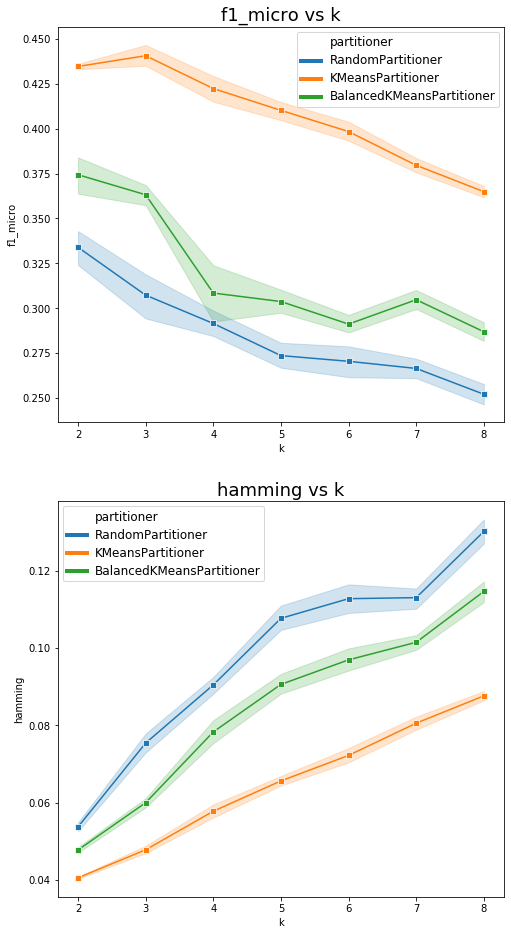

In [28]:
with open("../experiments/tsoumakas_mediamill_results.csv") as fi:
    results=pd.read_csv(fi)
mean_results=average_results(results)
display(mean_results)
plot_graphs(results)

* Predictive performance trends seem to be close to original reported results.

# Delicious

,prec_micro,prec_macro,rec_micro,rec_macro,f1_micro,f1_macro,hamming,p@1,p@3,p@5,...,dcg@3,dcg@5,partition_time,train_time,test_time,row_name,partitioner,split,k,r
0,0.214752,0.081839,0.198957,0.061549,0.206553,0.050481,0.029479,0.298901,0.216013,0.218022,...,0.429101,0.589405,3.792747,13.470345,2.655676,RandomPartitioner_s=0_k=2/r=0,RandomPartitioner,0.0,2.0,0.0
1,0.237241,0.079968,0.165287,0.044561,0.194832,0.044198,0.026346,0.243642,0.205024,0.232653,...,0.467628,0.642242,3.928023,16.158290,2.882231,RandomPartitioner_s=0_k=2/r=1,RandomPartitioner,0.0,2.0,1.0
2,0.206085,0.080272,0.180159,0.053704,0.192252,0.047646,0.029196,0.219152,0.188383,0.207473,...,0.414677,0.570802,4.064401,16.231625,3.101161,RandomPartitioner_s=0_k=2/r=2,RandomPartitioner,0.0,2.0,2.0
3,0.211720,0.080218,0.185492,0.054713,0.197740,0.047316,0.029027,0.215699,0.198221,0.211680,...,0.429177,0.591484,4.320083,29.213368,5.819504,RandomPartitioner_s=0_k=2/r=3,RandomPartitioner,0.0,2.0,3.0
4,0.219120,0.084302,0.194319,0.057546,0.205976,0.050105,0.028893,0.249608,0.207849,0.212684,...,0.432560,0.593539,4.830974,21.179894,4.271393,RandomPartitioner_s=0_k=2/r=4,RandomPartitioner,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.177612,0.085707,0.307286,0.103382,0.225110,0.067626,0.041065,0.243642,0.225850,0.219152,...,0.438642,0.599810,1.891874,18.407870,5.114410,RandomPartitioner_s=1_k=5/r=1,RandomPartitioner,1.0,5.0,1.0
122,0.156742,0.090881,0.279445,0.110162,0.200835,0.070105,0.043170,0.207221,0.186813,0.187943,...,0.398913,0.547692,1.916947,17.431353,5.990699,RandomPartitioner_s=1_k=5/r=2,RandomPartitioner,1.0,5.0,2.0
123,0.173758,0.084189,0.225903,0.089985,0.196429,0.061638,0.035878,0.223548,0.213919,0.202826,...,0.403333,0.555285,1.898917,20.237428,5.275428,RandomPartitioner_s=1_k=5/r=3,RandomPartitioner,1.0,5.0,3.0
124,0.172072,0.089892,0.295521,0.097134,0.217501,0.066353,0.041276,0.220722,0.195395,0.187441,...,0.409281,0.551826,1.769860,15.502378,5.184394,RandomPartitioner_s=1_k=5/r=4,RandomPartitioner,1.0,5.0,4.0


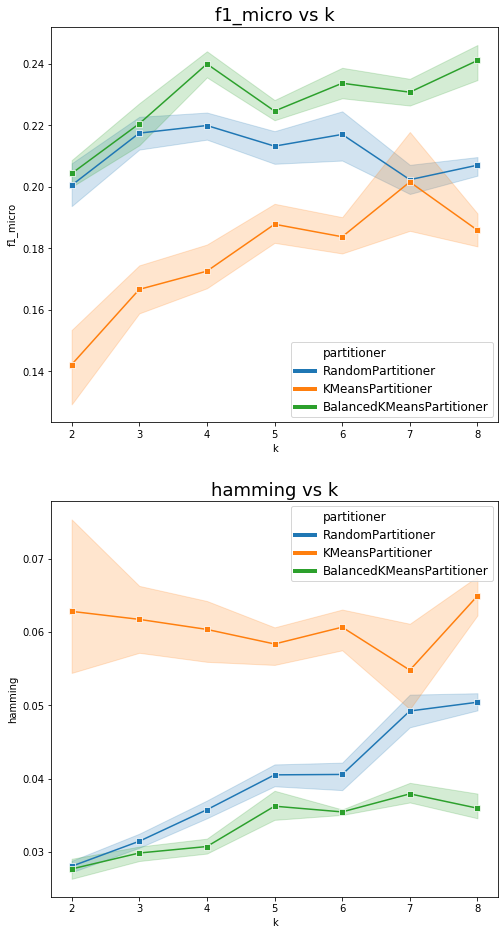

In [29]:
with open("../experiments/tsoumakas_deliciousl_results.csv") as fi:
    results=pd.read_csv(fi)
mean_results=average_results(results)
display(mean_results)
plot_graphs(results)

* Predictive performance trends seem to be close to original reported results.